## 감사의 말씀 및 출처

*   R 페이지 사용 편리하게 만들어주신 dataprofessor님께 감사의 말씀 드립니다. 
[출처](http://youtube.com/dataprofessor)

*   정말 좋은 강의 만들어주신 국민대 곽기영 교수님께 감사의 말씀 드립니다. [출처](https://www.youtube.com/watch?v=-Za5MrWUohg)





# 6월 20일 첫 번째 포아송 회귀분석 공부

## 포아송 회귀분석 개요

포아송 회귀분석(Poisson regression analysis)은 결과변수가 특정 기간 동안의 사건발생횟수(또는 개수)인 경우에 적용이 가능한 회귀분석이다([출처](https://www.youtube.com/watch?v=-Za5MrWUohg)).

*그렇다면 포아송 분포는 무엇이었던가?*

포아송 분포(Poisson distribution)는 확률론에서 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다([출처](https://ko.wikipedia.org/wiki/%ED%91%B8%EC%95%84%EC%86%A1_%EB%B6%84%ED%8F%AC#:~:text=%ED%91%B8%EC%95%84%EC%86%A1%20%EB%B6%84%ED%8F%AC(Poisson%E5%88%86%E5%B8%83,%ED%95%98%EB%8A%94%20%EC%9D%B4%EC%82%B0%20%ED%99%95%EB%A5%A0%20%EB%B6%84%ED%8F%AC%EC%9D%B4%EB%8B%A4.))).

### 예시
*   일정한 시간 동안 도착한 고객의 수
*   1km 도로 내에 있는 흠집의 수
*   특정 시간 동안 톨게이트를 통과하는 차량의 수
*   기타 등등 

### 포아성 가정에 어긋나는 사례
*   매년 캘리포니아 주에서 발생하는 진도5의 지진 빈도는 포아송 분포를 따르지 않는다. 왜냐하면 한 번 발생한 지진이 향후 지진의 가능성에 영향을 끼치기 때문에 두 사건이 독립적이지 않기 때문이다([출처](https://ko.wikipedia.org/wiki/%ED%91%B8%EC%95%84%EC%86%A1_%EB%B6%84%ED%8F%AC#:~:text=%ED%91%B8%EC%95%84%EC%86%A1%20%EB%B6%84%ED%8F%AC(Poisson%E5%88%86%E5%B8%83,%ED%95%98%EB%8A%94%20%EC%9D%B4%EC%82%B0%20%ED%99%95%EB%A5%A0%20%EB%B6%84%ED%8F%AC%EC%9D%B4%EB%8B%A4.))).







## 코드 작성

R에 내장된 데이터셋을 분석한 것으로 국민대학교 곽기영 교수님의 유튜브 영상의 내용이 대부분임([출처](https://www.youtube.com/watch?v=-Za5MrWUohg)).

In [1]:
install.packages("robust")
library(robust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘fit.models’, ‘robustbase’, ‘rrcov’


Loading required package: fit.models

Registered S3 methods overwritten by 'robust':
  method              from      
  plot.covfm          fit.models
  print.covfm         fit.models
  summary.covfm       fit.models
  print.summary.covfm fit.models

rlm is already registered in the fit.models registry

covfm is already registered in the fit.models registry


Attaching package: ‘robust’


The following objects are masked from ‘package:fit.models’:

    ddPlot.covfm, distancePlot.covfm, ellipsesPlot.covfm,
    screePlot.covfm




In [2]:
data("breslow.dat") #데이터 불러오기 
# 뇌전증 환자의 치료전 8주 간의 발작횟수와 치료후 8주간의 발작횟수에 대한 데이터가 있다. 
str(breslow.dat)

'data.frame':	59 obs. of  12 variables:
 $ ID   : int  104 106 107 114 116 118 123 126 130 135 ...
 $ Y1   : int  5 3 2 4 7 5 6 40 5 14 ...
 $ Y2   : int  3 5 4 4 18 2 4 20 6 13 ...
 $ Y3   : int  3 3 0 1 9 8 0 23 6 6 ...
 $ Y4   : int  3 3 5 4 21 7 2 12 5 0 ...
 $ Base : int  11 11 6 8 66 27 12 52 23 10 ...
 $ Age  : int  31 30 25 36 22 29 31 42 37 28 ...
 $ Trt  : Factor w/ 2 levels "placebo","progabide": 1 1 1 1 1 1 1 1 1 1 ...
 $ Ysum : int  14 14 11 13 55 22 12 95 22 33 ...
 $ sumY : int  14 14 11 13 55 22 12 95 22 33 ...
 $ Age10: num  3.1 3 2.5 3.6 2.2 2.9 3.1 4.2 3.7 2.8 ...
 $ Base4: num  2.75 2.75 1.5 2 16.5 6.75 3 13 5.75 2.5 ...


In [3]:
seizure = breslow.dat[c("Base", "Age", "Trt", "sumY")] #분석에 필요한 4개의 데이터만을 추출 
#SumY는 치료 후 8주간 발작횟수이고 Base는 치료 전 발작횟수, Trt는 치료제 종류로 progabide가 진약을 의미함.

      Base             Age               Trt          sumY       
 Min.   :  6.00   Min.   :18.00   placebo  :28   Min.   :  0.00  
 1st Qu.: 12.00   1st Qu.:23.00   progabide:31   1st Qu.: 11.50  
 Median : 22.00   Median :28.00                  Median : 16.00  
 Mean   : 31.22   Mean   :28.34                  Mean   : 33.05  
 3rd Qu.: 41.00   3rd Qu.:32.00                  3rd Qu.: 36.00  
 Max.   :151.00   Max.   :42.00                  Max.   :302.00  

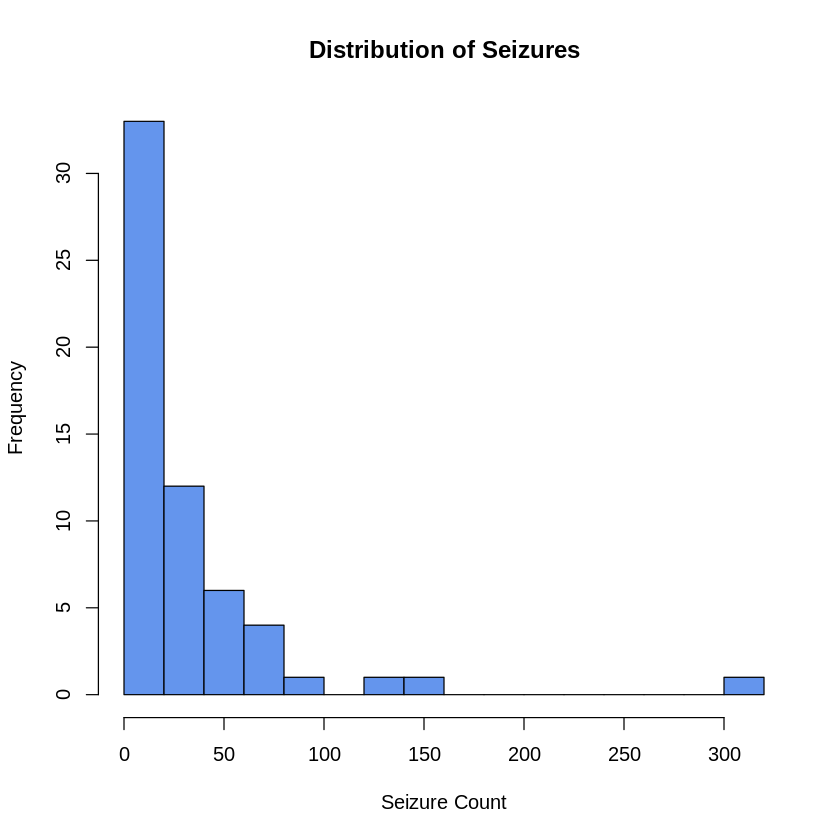

In [4]:
summary(seizure) #sumY의 median이 mean보다 훨씬 작음. 왼쪽으로 치우치지 않았을까?
hist(seizure$sumY, breaks = 20, col="cornflowerblue", xlab = "Seizure Count", main = "Distribution of Seizures") #왼쪽으로 치우친 분포임을 확인

In [6]:
#그러나 hist 안그리고 좀 더 효율적으로 살펴볼 수 있는 방법. 
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




In [7]:
psych::describe(seizure$sumY, trim = 0.05) #Skew(왜도)가 양수이므로 오른쪽으로 긴꼬리 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,59,33.05085,45.58411,16,27.30909,14.826,0,302,302,3.862289,18.49612,5.934546


In [8]:
#포아송 회귀모델은 일반 선형 모델 범주에 속함. 따라서  glm함수를 동일하게 사용 가능하다. glm -> Generalized Linear Model 
seizure.poisson <- glm(sumY~Base+Age+Trt, data=seizure, family = poisson)
summary(seizure.poisson)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = poisson, data = seizure)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9488259  0.1356191  14.370  < 2e-16 ***
Base          0.0226517  0.0005093  44.476  < 2e-16 ***
Age           0.0227401  0.0040240   5.651 1.59e-08 ***
Trtprogabide -0.1527009  0.0478051  -3.194   0.0014 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: 850.71

Number of Fisher Scoring iterations: 5


세 예측변수 모두 유의수준 0.05 하에서 통계적으로 유의함. 

회귀모델 자체의 유의성 검정은 하단 deviance(이탈도)를 통해 할 수 있다. 이탈도는 예측모델의 비적합도를 나타내는 지표이다. 당연하게도 이탈도가 클수록 적합하지 않다는 것을 의미함. 
Null model은 예측변수에 상수항만을 포함하는 모델을 말하는데 Null dviance는 그런 모델에 대한 이탈도를 의미한다. 또 그 아래 Residual deviance는 위 검정에서 나온 예측변수들을 포함한 모델에 대한 이탈도이다.
이 두 이탈도에 대한 차이 검정(chi-square)을 통해 이탈도에 대한 차이가 유의한지 알아본다. 



In [9]:
pchisq(q= 2122.73-559.44, df=58-55, lower.tail = FALSE) #카이제곱에서 오른쪽 꼬리부분의 면적이 유의확률이기 때문에 lower.tail을 False로 지정

[1] 0

둘 간의 차이는 통계적으로 유의하다. 즉, 추가한 세 개의 예측변수는 모델의 적합도 개선에 통계적으로 의미있는 기여를 한다. 현재의 모델이 통계적으로 유의하다. 

추정된 베타계수(Estimate Std)는 원래의 관측값과 척도가 다르기 때문에 해석상에 어려움이 발생함. 따라서 결과변수의 원래의 척도대로 해석할 수 있도록 **지수함수**를 취한다. 

In [10]:
exp(coef(seizure.poisson)) #나이 1살이 증가할 때마다 발작의 횟수를 1.023 배 증가시킨다. 위약(1)에서 진약(2)로 한 단위 증가할 때 발작 횟수가 약 0.86배 증가한다. 진약을 처방 받은 집단이 그렇지 않은 집단에 비해 발작이 약 14% 감소한다.  

(Intercept)         Base          Age Trtprogabide 
   7.0204403    1.0229102    1.0230007    0.8583864

## 과대산포(Over-dispersion) 문제 

포아송 분포에서는 **평균=분산**이라고 가정함. 
분산이 평균보다 클 때(과대산포)일 때는 포아송 회귀모형을 사용할 수 없다. 과대산포 시 적용할 수 있는 대안 모델로는 과대산포 포아송 회귀(Overdispersed Poisson Regression), 음이항회귀(Negative Binomial Regression)가 있다([출처](https://rfriend.tistory.com/490)).

결과변수의 실제 관측된 분산이 포아송 분포에 의해 기대되는 분산보다 클 때 발생함. 즉 분산대 평균의 비율이 1보다 클 때 발생. 
- 과산포가 발생하면 표준오차가 매우 작아짐. 
- t통계량은 회귀계수를 표준오차로 나누어 계산하기 때문에 과산포시 t값이 커진다. 
- t값이 커지면 유의확률이 작아져서 "회귀계수가 0"이라는 H0을 쉽게 기각한다(1종 오류에 대한 우려).

포아송 분포는 각 사건의 발생률이 일정하다고 가정한다. 다음 사건이 일어날 때까지 간격은 일정하다라는 것. 그러나 현실에서는 그런 가정이 위반 되는 경우가 태반이다. 따라서 관측값의 변동성이 기대한 것보다 과대되어 나타날 수 있다. 

**로지스틱 회귀분석과 마찬가지로 잔차 이탈도 대 잔차 자유도의 비율이 2를 크게 상회 -> 과산포 의심!**




In [11]:
#잔차 이탈도 대 잔차 자유도 비율 계산 

deviance(seizure.poisson)/df.residual(seizure.poisson) #2를 아주 크게 상회!

[1] 10.1717

In [13]:
#더 간단한 과산포 검정 
install.packages("qcc")
library(qcc)
qcc.overdispersion.test(seizure$sumY, type="poisson") #"데이터가 과산포가 아니다"라는 귀무가설을 검정함. 유의확률이 0으로 유의수준 0.05 하에서 귀무가설 기각. 즉 데이터가 과산포다!


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



,Obs.Var/Theor.Var,Statistic,p-value
poisson data,62.87013,3646.468,0


### 과산포 문제가 있는 경우의 포아송 회귀분석



In [15]:
seizure.qpoisson <- glm(sumY ~ Base + Age + Trt, data=seizure, family = quasipoisson())
summary(seizure.qpoisson)
summary(seizure.poisson) #비교


Call:
glm(formula = sumY ~ Base + Age + Trt, family = quasipoisson(), 
    data = seizure)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.948826   0.465091   4.190 0.000102 ***
Base          0.022652   0.001747  12.969  < 2e-16 ***
Age           0.022740   0.013800   1.648 0.105085    
Trtprogabide -0.152701   0.163943  -0.931 0.355702    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 11.76075)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5



Call:
glm(formula = sumY ~ Base + Age + Trt, family = poisson, data = seizure)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9488259  0.1356191  14.370  < 2e-16 ***
Base          0.0226517  0.0005093  44.476  < 2e-16 ***
Age           0.0227401  0.0040240   5.651 1.59e-08 ***
Trtprogabide -0.1527009  0.0478051  -3.194   0.0014 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: 850.71

Number of Fisher Scoring iterations: 5


회귀계수는 상수항 1.95, Base 0.02, Age 0.02, Trt  0.15로 동일하다.  반면 표준오차(Std. Error)가 매우 커졌다. **따라서 더 커진 표준오차로 인해 회귀계수를 표준오차로 나눠 구하는 t통계량이 감소한다.** 그로 인해 유의확률이 증가하여 유의수준 0.05 하에서 귀무가설을 기각하지 못한다. ->  "회귀계수는 통계적으로 유의하지 않다"

본 데이터셋으로 결과를 해석하면 "실제 뇌졸증 치료제를 처방 받은 환자집단이 위약(placebo)을 처방 받은 집단보다 발작횟수가 적다고 할만한 증거가 충분하지 않다" 나이 역시 마찬가지. 따라서 치료 이전에 발작 횟수만이 향후 발작횟수를 예측하는 데 유의한 영향으로 나타났다. 


## 관측값의 시간 간격이 다른 경우

위에서 알아본 데이터셋은 발작횟수를 측정한 시간간격은 모든 환자에 대해서 동일했다. 그러나 현실에서는 그렇지 않은 경우가 허다하다. 

각 관측값의 시간 간격이 다른 경우에는 결과변수는 사건발생횟수를 단위 시간으로 나눈 사건발생률이 된다. 즉 **단위 시간당 발생횟수가 분석대상**이 된다. 

사건발생률을 분석하기 위해서는 각 관측값에 대해 얼마의 기간동안 사건발생횟수를 측정했는지 나타내는 시간 변수가 포아송회귀모델에 포함되어야 한다. 

In [16]:
library(MASS)
str(ships) 
#단순 손상횟수가 아닌 '사용 기간' 당 손상횟수를 결과변수로 한다. 

'data.frame':	40 obs. of  5 variables:
 $ type     : Factor w/ 5 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ year     : int  60 60 65 65 70 70 75 75 60 60 ...
 $ period   : int  60 75 60 75 60 75 60 75 60 75 ...
 $ service  : int  127 63 1095 1095 1512 3353 0 2244 44882 17176 ...
 $ incidents: int  0 0 3 4 6 18 0 11 39 29 ...


In [20]:
#사용기간 당 손상횟수로 나타내기 위한 전처리
shipsinc <- subset(ships, service > 0) #사용 기간이 0인 배는 제외
shipsinc$year <- as.factor(shipsinc$year) #범주형으로 변환
shipsinc$period <- as.factor(shipsinc$period) 
levels(shipsinc$year)
levels(shipsinc$period)

[1] "60" "65" "70" "75"

[1] "60" "75"

In [25]:
shipsinc.poisson <- glm(incidents ~ type + year + period, data=shipsinc, family = poisson(), offset = log(service)) #offset으로 시간변수 지정함. 
deviance(shipsinc.poisson)/df.residual(shipsinc.poisson) #과산포 검정
qcc.overdispersion.test(shipsinc$incidents, type = "poisson") #데이터가 과산포가 아니라는 귀무가설 기각함. ㅠ 
summary(shipsinc.poisson) #분석 결과

[1] 1.547802

,Obs.Var/Theor.Var,Statistic,p-value
poisson data,23.64624,780.3258,0



Call:
glm(formula = incidents ~ type + year + period, family = poisson(), 
    data = shipsinc, offset = log(service))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6768  -0.8293  -0.4370   0.5058   2.7912  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.40590    0.21744 -29.460  < 2e-16 ***
typeB       -0.54334    0.17759  -3.060  0.00222 ** 
typeC       -0.68740    0.32904  -2.089  0.03670 *  
typeD       -0.07596    0.29058  -0.261  0.79377    
typeE        0.32558    0.23588   1.380  0.16750    
year65       0.69714    0.14964   4.659 3.18e-06 ***
year70       0.81843    0.16977   4.821 1.43e-06 ***
year75       0.45343    0.23317   1.945  0.05182 .  
period75     0.38447    0.11827   3.251  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 146.328  on 33  degrees of freedom
Residual deviance:  38.695  on 25  degrees

In [27]:
shipsinc.qpoisson <- update(shipsinc.poisson, family=quasipoisson()) #update함수를 이용해서 기존 생성모델을 기반으로 해서 새로운 모델 쉽게 추정 가능함. 
summary(shipsinc.qpoisson)


Call:
glm(formula = incidents ~ type + year + period, family = quasipoisson(), 
    data = shipsinc, offset = log(service))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6768  -0.8293  -0.4370   0.5058   2.7912  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.40590    0.28276 -22.655  < 2e-16 ***
typeB       -0.54334    0.23094  -2.353  0.02681 *  
typeC       -0.68740    0.42789  -1.607  0.12072    
typeD       -0.07596    0.37787  -0.201  0.84230    
typeE        0.32558    0.30674   1.061  0.29864    
year65       0.69714    0.19459   3.583  0.00143 ** 
year70       0.81843    0.22077   3.707  0.00105 ** 
year75       0.45343    0.30321   1.495  0.14733    
period75     0.38447    0.15380   2.500  0.01935 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1.691028)

    Null deviance: 146.328  on 33  degrees of freedom
Residual deviance:  38.69

In [28]:
exp(coef(shipsinc.qpoisson))

(Intercept)       typeB       typeC       typeD       typeE      year65 
 0.00165178  0.58080262  0.50288104  0.92685196  1.38483286  2.00800246 
     year70      year75    period75 
 2.26693019  1.57369544  1.46883116

- 선박 종류는 A~E형. 손상 위험은 C형< B형< D형< A형 < E형 순이다. 기준범주인 A형 선박(1.0)에 비해 B형 선박은 손상 위험이 0.58배 높다. C형 선박은 0.5배.

- 건조시점은 1960년부터 5년 간격. 손상위험은 year60 < period75 < year75 < year65 < year70 순이다. 1960년~1964년 제작된(year60) 선박에 비해 1975년~1979년 운행된 선박(period75)의 손상위험은 1.47배 높다. 

# 다음 예제 

https://statkclee.github.io/statistics/stat-flying-bomb-poisson.html
